# Brazil EDA

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
UN_data = pd.read_csv('../../Datasets/Original_Data/UN_Office_Drugs_Crime_2021_Full_Dataset.csv')
UN_data.columns.to_list()

['Iso3_code',
 'Country',
 'Region',
 'Subregion',
 'Indicator',
 'Dimension',
 'Category',
 'Sex',
 'Age',
 'Year',
 'Unit of measurement',
 'VALUE',
 'Source']

In [3]:
# Getting data for only Brazil
brazil = UN_data[UN_data['Country'] == 'Brazil']
brazil['Year'].unique()

array([2012, 2013, 2014, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2000], dtype=int64)

In [4]:
brazil.drop(columns=['Iso3_code', 'Region', 'Source', 'Subregion'], inplace=True)

C:\Users\Alex_Compu\AppData\Local\Temp\ipykernel_17996\3438389640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil.drop(columns=['Iso3_code', 'Region', 'Source', 'Subregion'], inplace=True)


In [5]:
# Filtering to only the years we are interested in:

brazil = brazil.loc[brazil['Year'].isin([2010,2011,2012,2013,2014,2015,
                                            2016,2017,2018,2019,2020,2021])]

brazil = brazil[brazil['Dimension'] == 'Total']

In [6]:
brazil.dtypes

Country                 object
Indicator               object
Dimension               object
Category                object
Sex                     object
Age                     object
Year                     int64
Unit of measurement     object
VALUE                  float64
dtype: object

# Visualizations for Male vs. Female

In [7]:
# Separating total count vs rate per 100,000 people:
brazil_counts = brazil[brazil['Unit of measurement'] == 'Counts']
brazil_rates = brazil[brazil['Unit of measurement'] == 'Rate per 100,000 population']

In [8]:
# Separating male vs female prison populations for visualization: 
brazil_male = brazil_counts[brazil_counts['Sex'] == 'Male' ]
brazil_female = brazil_counts[brazil_counts['Sex'] == 'Female' ]
brazil_female = brazil_female[brazil_female['Year']!= 2020]
brazil_female.drop(columns=['Indicator', 'Dimension', 'Category', 'Sex', 'Age', 'Unit of measurement'], inplace=True)
brazil_male.drop(columns=['Indicator', 'Dimension', 'Category', 'Sex', 'Age', 'Unit of measurement'], inplace=True)
brazil_female.shape, brazil_male.shape

C:\Users\Alex_Compu\AppData\Local\Temp\ipykernel_17996\2484890357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_male.drop(columns=['Indicator', 'Dimension', 'Category', 'Sex', 'Age', 'Unit of measurement'], inplace=True)


((28, 3), (28, 3))

In [9]:
# Creating a new column to concatenate male and female totals: 
brazil_female['Females'] = brazil_female['VALUE']
brazil_male['Males'] = brazil_male['VALUE']

C:\Users\Alex_Compu\AppData\Local\Temp\ipykernel_17996\2775742304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_male['Males'] = brazil_male['VALUE']


In [10]:
# Dropping the unnecessary VALUE column and resetting the index: 
brazil_male.drop(columns='VALUE', inplace=True)
brazil_female.drop(columns='VALUE', inplace=True)
brazil_male.set_index('Country', inplace=True)
brazil_female.set_index('Country', inplace=True)

C:\Users\Alex_Compu\AppData\Local\Temp\ipykernel_17996\1720152489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_male.drop(columns='VALUE', inplace=True)


In [11]:

brazil_female.head()

,Year,Females
Country,,
Brazil,2010,34807.0
Brazil,2011,34058.0
Brazil,2012,35223.0
Brazil,2013,35100.0
Brazil,2014,37380.0


In [12]:
brazil_gender_totals = brazil_female.merge(brazil_male, on='Year')

In [13]:
brazil_gender_totals

,Year,Females,Males
0,2010,34807.0,461444.0
1,2010,34807.0,16815.0
2,2010,34807.0,478259.0
3,2010,888.0,461444.0
4,2010,888.0,16815.0
...,...,...,...
75,2019,191.0,4168.0
76,2019,191.0,718007.0
77,2019,37197.0,718007.0
78,2019,37197.0,4168.0


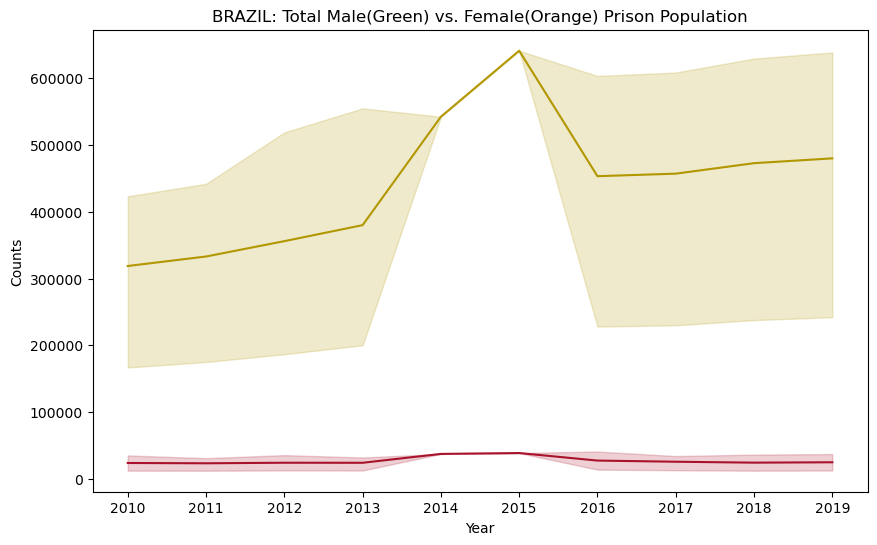

In [20]:
plt.figure(figsize=(10,6))
sns.set_context(font_scale=3)
sns.lineplot(data=brazil_gender_totals, x='Year', y='Males', color='#B29700'),
sns.lineplot(data=brazil_gender_totals, x='Year', y='Females', color='#A8122A')
plt.ylabel('Counts')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.title('BRAZIL: Total Male(Green) vs. Female(Orange) Prison Population')
plt.savefig('../../Images/Brazil_male_female.png');

# Visualizaitons for Youth Vs. Adults

In [15]:
brazil_counts['Age'].unique()

array(['Total', 'Adult', 'Juveniles'], dtype=object)

In [16]:
# Separating adults vs juveniles prison populations for visualization: 
brazil_adults = brazil_counts[brazil_counts['Age'] == 'Adult' ]
brazil_youth = brazil_counts[brazil_counts['Age'] == 'Juveniles' ]

In [17]:
round(brazil_adults['VALUE'].mean())

392041

In [18]:
round(brazil_youth['VALUE'].mean())

12613

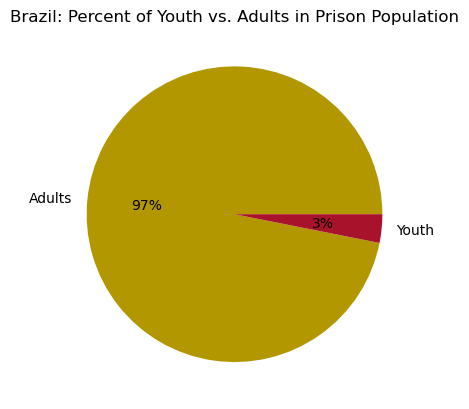

In [19]:
totals = [392_041, 12_613]
keys = ['Adults', 'Youth']
colors = ['#B29700', '#A8122A']
plt.pie(totals, labels=keys,autopct='%.0f%%', colors=colors)
plt.title('Brazil: Percent of Youth vs. Adults in Prison Population')
plt.savefig('../../Images/Brazil_Youth_Adults.png');

# Code Source: https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/